In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful.eda import basic_info
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, confusion_matrix

basic info for this dataframe...


,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


Index(['25k', 'name', '10k', 'gender', 'half', 'bib', 'ctz', 'country',
       'state', '30k', '5k', '20k', '35k', 'city', '40k'],
      dtype='object')
The number of non-numerical columns is 15
Index(['age', 'division', 'official', 'overall', 'pace', 'genderdiv'], dtype='object')
The number of numerical columns is 6
missing data/column names....
               0
ctz        15407
state       1463
city           1
40k            0
bib            0
age            0
name           0
division       0
10k            0
gender         0
half           0
official       0
country        0
overall        0
pace           0
30k            0
5k             0
genderdiv      0
20k            0
35k            0
25k            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null ob

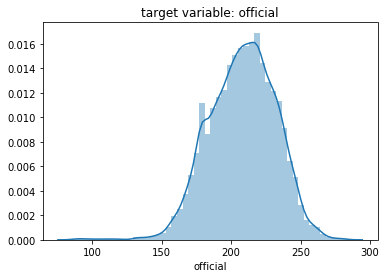

In [8]:
df = pd.read_csv('results/2013/results.csv')

basic_info.data_info(df, 'official')

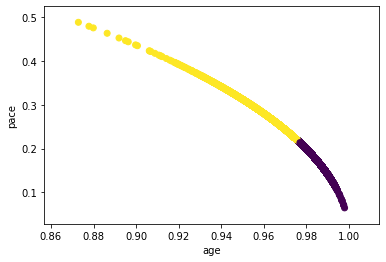

In [45]:
#Age is just a number? target variable == official

X,y=df[['age','pace']],df[['official']] #set target variables

X_norm = normalize(X) #normalize the data

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm) #calculate the predicted values

plt.scatter(X_norm[:,0],X_norm[:,1],c=y_pred) #plot x=age, y=pace
plt.xlabel('age')
plt.ylabel('pace')
plt.show()

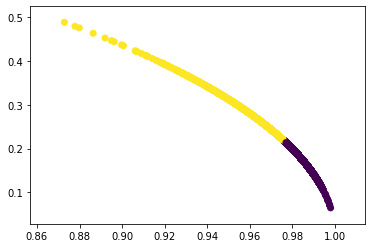

col_0     0     1
row_0            
0      4335  7493
1      1444  2892

              precision    recall  f1-score   support

           0       0.37      0.75      0.49      5779
           1       0.67      0.28      0.39     10385

    accuracy                           0.45     16164
   macro avg       0.52      0.51      0.44     16164
weighted avg       0.56      0.45      0.43     16164



In [76]:
X,y=df[['age','pace']],df['official'].apply(lambda x: 0 if x<200 else 1) #cutoff = 2:00

X_norm=normalize(X)

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

plt.scatter(X_norm[:,0],X_norm[:,1],c=y_pred)
plt.show()

print(pd.crosstab(y_pred,y.values.ravel()))
print('')
print(classification_report(y.values.ravel(), y_pred))

In [77]:
minibatchkmeans = MiniBatchKMeans(init='random',n_clusters=2,batch_size=200)
minibatchkmeans.fit(X_norm)

predict_mini = minibatchkmeans.predict(X_norm)

print(pd.crosstab(predict_mini,y.values.ravel()))
print('')
print(classification_report(y.values.ravel(), predict_mini))

col_0     0     1
row_0            
0      4390  7619
1      1389  2766

              precision    recall  f1-score   support

           0       0.37      0.76      0.49      5779
           1       0.67      0.27      0.38     10385

    accuracy                           0.44     16164
   macro avg       0.52      0.51      0.44     16164
weighted avg       0.56      0.44      0.42     16164



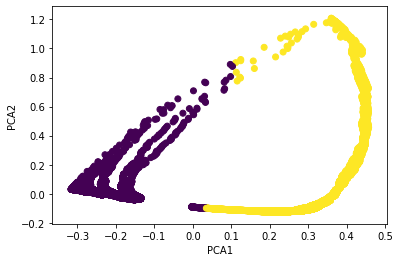

col_0     0     1
row_0            
0      2351  7121
1      3428  3264

              precision    recall  f1-score   support

           0       0.25      0.41      0.31      5779
           1       0.49      0.31      0.38     10385

    accuracy                           0.35     16164
   macro avg       0.37      0.36      0.35     16164
weighted avg       0.40      0.35      0.36     16164



In [79]:
X,y=df[['age','division','official','pace','genderdiv']],df['official'].apply(lambda x: 0 if x<200 else 1)

X_norm=normalize(X)

X_pca=PCA(2).fit_transform(X_norm)

y_pred=KMeans(n_clusters=2,random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('')

plt.show()

print(pd.crosstab(y_pred,y.values.ravel()))
print('')
print(classification_report(y.values.ravel(), y_pred))